In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [59]:
#1년치 Amazon데이터 불러오기(120일 이동평균선을 고려하여 더 많이 불러오기)
start = "2022-05-08"
end = "2023-12-08"
symbol = "AMZN"
df_Amazon = yf.download(symbol, start, end)
print(df_Amazon)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-05-09  111.312500  114.000000  107.957001  108.789001  108.789001  \
2022-05-10  111.250000  112.642502  107.170998  108.859001  108.859001   
2022-05-11  108.103500  110.155998  104.428497  105.372002  105.372002   
2022-05-12  102.750000  110.780502  102.405502  106.930496  106.930496   
2022-05-13  109.069000  113.183998  107.800003  113.055000  113.055000   
...                ...         ...         ...         ...         ...   
2023-12-01  146.000000  147.250000  145.550003  147.029999  147.029999   
2023-12-04  145.250000  145.350006  142.809998  144.839996  144.839996   
2023-12-05  143.550003  148.570007  143.130005  146.880005  146.880005   
2023-12-06  147.580002  147.850006  144.279999  144.520004  144.520004   
2023-12-07  146.149994  147.919998  145.339

In [60]:
#Nan값 존재하는지 확인x
df_Amazon.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/119238901.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


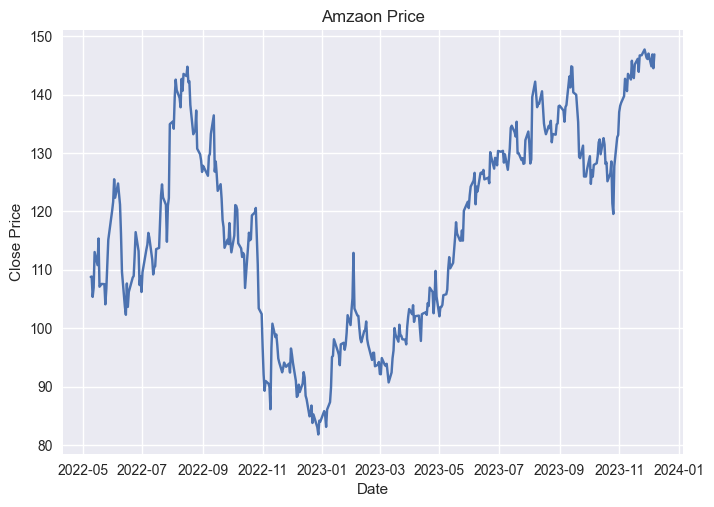

In [61]:
#Amazon 종가 시각화
plt.style.use("seaborn")
close = df_Amazon["Close"]
plt.plot(close)
plt.title("Amzaon Price")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

In [62]:
amazon = close.to_frame()
amazon["yesterday"] = amazon["Close"].shift(1) # 전날 가격 shift하여 column추가
amazon["diff"] = amazon.Close.sub(amazon.yesterday) #전날가격과의 차이 구하여 column추가
amazon["Return"] = amazon.Close.div(amazon.yesterday) -1 #수익률 구하여 column추가
amazon["Return(%)"] = amazon.Return.mul(100)
clean_amazon = amazon.fillna(0) 
clean_amazon

,Close,yesterday,diff,Return,Return(%)
Date,,,,,
2022-05-09,108.789001,0.000000,0.000000,0.000000,0.000000
2022-05-10,108.859001,108.789001,0.070000,0.000643,0.064344
2022-05-11,105.372002,108.859001,-3.487000,-0.032032,-3.203226
2022-05-12,106.930496,105.372002,1.558495,0.014790,1.479040
2022-05-13,113.055000,106.930496,6.124504,0.057276,5.727556
...,...,...,...,...,...
2023-12-01,147.029999,146.089996,0.940002,0.006434,0.643441
2023-12-04,144.839996,147.029999,-2.190002,-0.014895,-1.489494
2023-12-05,146.880005,144.839996,2.040009,0.014085,1.408457


In [63]:
clean_amazon['Return(%)'].describe()

count    399.000000
mean       0.107351
std        2.542529
min       -8.431498
25%       -1.474424
50%        0.078038
75%        1.655216
max       12.177848
Name: Return(%), dtype: float64

/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/3705681538.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


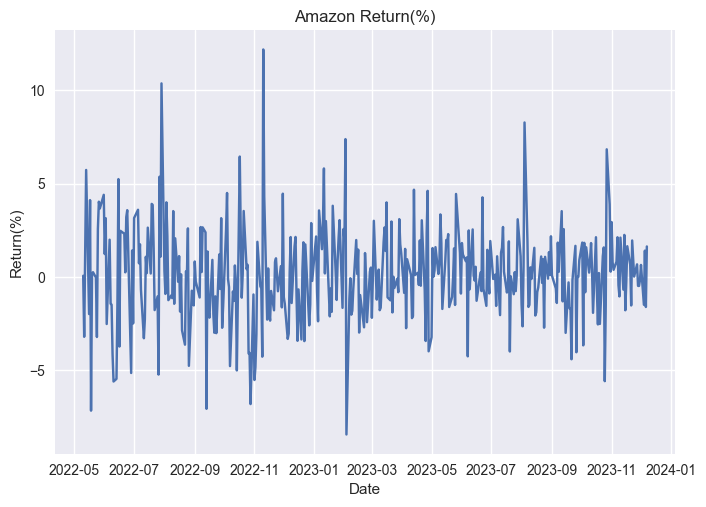

In [64]:
#수익률 시각화
plt.style.use("seaborn")
plt.plot(amazon["Return(%)"])
plt.xlabel("Date")
plt.ylabel("Return(%)")
plt.title("Amazon Return(%)")
plt.show()


In [65]:
data_1dimension_amazon = clean_amazon["Return(%)"].values
data_1dimension_amazon

array([ 0.00000000e+00,  6.43444593e-02, -3.20322571e+00,  1.47904049e+00,
        5.72755604e+00, -1.98531617e+00,  4.11332736e+00, -7.15619664e+00,
        1.92785330e-01,  2.53452952e-01, -3.16050695e-02, -3.21411043e+00,
        2.56964754e+00,  4.02949923e+00,  3.66320836e+00,  4.39701038e+00,
        1.22660430e+00,  3.14503430e+00, -2.51850680e+00,  1.99428073e+00,
       -1.43441053e+00, -1.47967455e+00, -4.15084896e+00, -5.59621172e+00,
       -5.45371936e+00, -1.31185554e+00,  5.23898029e+00, -3.72433786e+00,
        2.46960975e+00,  2.31594714e+00,  2.48432685e-01,  3.20330940e+00,
        3.57523706e+00, -2.78206928e+00, -5.14043423e+00,  1.41526687e+00,
       -2.48806384e+00,  3.15412720e+00,  3.59620530e+00,  7.31279146e-01,
        1.74932211e+00, -6.79103329e-01, -3.28025003e+00, -2.26398101e+00,
        1.08038847e+00,  2.08329460e-01,  2.63943403e+00,  1.84939744e-01,
        3.91174127e+00,  3.85753963e+00,  1.51502864e+00, -1.77324812e+00,
       -1.04557981e+00, -

In [66]:
#Dickey-Fuller검증
result = adfuller(data_1dimension_amazon)
print('Dickey-Fuller 검정 통계량 (ADF Statistic):', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# 결과 해석
if result[1] <= 0.05:
    print("p-value가 유의수준 0.05보다 작으므로 시계열 데이터는 안정적이지 않다는 귀무가설을 기각할 수 있습니다.")
else:
    print("p-value가 유의수준 0.05보다 크므로 시계열 데이터는 안정적이라는 귀무가설을 기각할 수 없습니다.")


Dickey-Fuller 검정 통계량 (ADF Statistic): -19.746400332352664
p-value: 0.0
Critical Values: {'1%': -3.4468876315017423, '5%': -2.868829424528516, '10%': -2.570653059771218}
p-value가 유의수준 0.05보다 작으므로 시계열 데이터는 안정적이지 않다는 귀무가설을 기각할 수 있습니다.


In [67]:
#나스닥 데이터 불러오기
start = "2022-12-08"
end = "2023-12-08"
symbol = "^IXIC"
df_Nasdaq = yf.download(symbol, start, end)
df_Nasdaq

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-08,11011.330078,11119.160156,10939.469727,11082.000000,11082.000000,4281800000
2022-12-09,11038.169922,11138.700195,10999.259766,11004.620117,11004.620117,4337440000
2022-12-12,11015.480469,11144.669922,10984.820312,11143.740234,11143.740234,4829990000
2022-12-13,11542.839844,11571.639648,11160.540039,11256.809570,11256.809570,6126890000
2022-12-14,11248.089844,11352.089844,11065.240234,11170.889648,11170.889648,5485150000
...,...,...,...,...,...,...
2023-12-01,14181.349609,14311.950195,14135.000000,14305.030273,14305.030273,5607000000
2023-12-04,14168.660156,14197.519531,14058.519531,14185.490234,14185.490234,6270020000
2023-12-05,14126.400391,14285.660156,14121.759766,14229.910156,14229.910156,6179120000


In [68]:
#Nan값 있는지 확인
df_Nasdaq.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/818823043.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


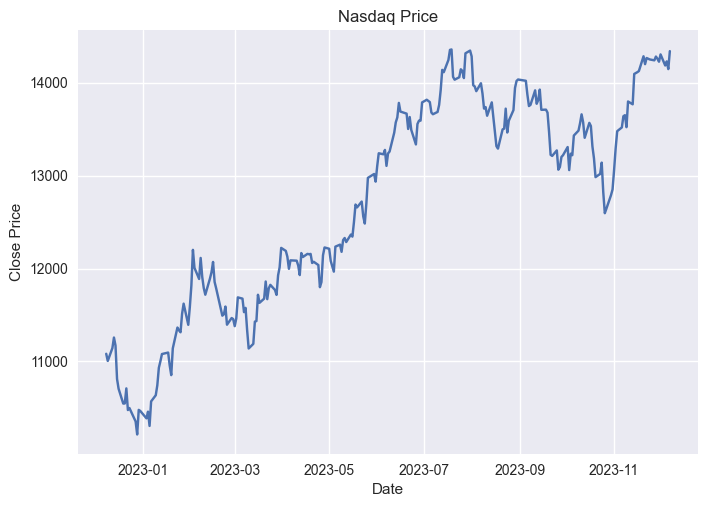

In [69]:
#시각화
plt.style.use("seaborn")
close_Nasdaq = df_Nasdaq["Close"]
plt.plot(close_Nasdaq)
plt.title("Nasdaq Price")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

In [70]:
#아마존 수익률 처럼 변동량으로 station한 데이터로 변경
nasdaq = close_Nasdaq.to_frame()
nasdaq["yesterday"] = nasdaq["Close"].shift(1)
nasdaq["diff"] = nasdaq.Close.sub(nasdaq.yesterday)
nasdaq["Return"] = nasdaq.Close.div(nasdaq.yesterday) -1
nasdaq["Return(%)"] = nasdaq.Return.mul(100)
clean_nasdaq = nasdaq.fillna(0)
clean_nasdaq

,Close,yesterday,diff,Return,Return(%)
Date,,,,,
2022-12-08,11082.000000,0.000000,0.000000,0.000000,0.000000
2022-12-09,11004.620117,11082.000000,-77.379883,-0.006982,-0.698248
2022-12-12,11143.740234,11004.620117,139.120117,0.012642,1.264197
2022-12-13,11256.809570,11143.740234,113.069336,0.010146,1.014644
2022-12-14,11170.889648,11256.809570,-85.919922,-0.007633,-0.763271
...,...,...,...,...,...
2023-12-01,14305.030273,14226.219727,78.810547,0.005540,0.553981
2023-12-04,14185.490234,14305.030273,-119.540039,-0.008357,-0.835650
2023-12-05,14229.910156,14185.490234,44.419922,0.003131,0.313136


In [71]:
clean_nasdaq['Return(%)'].describe()

count    251.000000
mean       0.109262
std        1.145510
min       -3.225879
25%       -0.647595
50%        0.083682
75%        0.868992
max        3.253974
Name: Return(%), dtype: float64

/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/2628683287.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


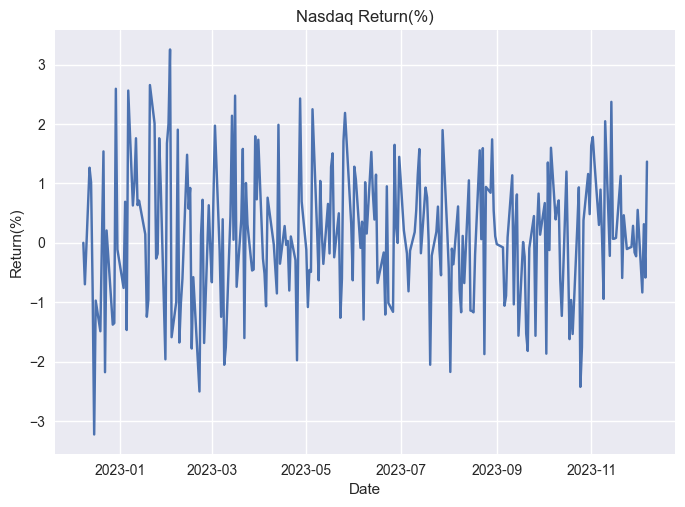

In [72]:
#변동률 시각화
plt.style.use("seaborn")
plt.plot(clean_nasdaq["Return(%)"])
plt.xlabel("Date")
plt.ylabel("Return(%)")
plt.title("Nasdaq Return(%)")
plt.show()

In [73]:
# df_Amazon에 보조지표들 추가하기(3, 5, 20, 60, 120 이동평균선, 수익률, 나스닥 변동률 추가)
ma = [3, 5, 20, 60, 120]
for days in ma:
    df_Amazon['ma_'+str(days)] = df_Amazon['Close'].rolling(window = days).mean()
df_Amazon['Return_amazon(%)'] = clean_amazon['Return(%)']
df_Amazon['Return_Nasdaq(%)'] = clean_nasdaq['Return(%)']
df_Amazon

,Open,High,Low,Close,Adj Close,Volume,ma_3,ma_5,ma_20,ma_60,ma_120,Return_amazon(%),Return_Nasdaq(%)
Date,,,,,,,,,,,,,
2022-05-09,111.312500,114.000000,107.957001,108.789001,108.789001,128124000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2022-05-10,111.250000,112.642502,107.170998,108.859001,108.859001,105434000,NaN,NaN,NaN,NaN,NaN,0.064344,NaN
2022-05-11,108.103500,110.155998,104.428497,105.372002,105.372002,109704000,107.673335,NaN,NaN,NaN,NaN,-3.203226,NaN
2022-05-12,102.750000,110.780502,102.405502,106.930496,106.930496,132026000,107.053833,NaN,NaN,NaN,NaN,1.479040,NaN
2022-05-13,109.069000,113.183998,107.800003,113.055000,113.055000,93684000,108.452499,108.601100,NaN,NaN,NaN,5.727556,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,146.480001,146.839999,144.228501,135.699501,134.025501,0.643441,0.553981
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,145.986664,146.262000,144.540501,135.809667,134.177000,-1.489494,-0.835650
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,146.250000,146.232001,144.897501,135.872667,134.347501,1.408457,0.313136


In [84]:
#위의 데이터 프레임에서 최근 1년치 데이터만 가져오기
new_df = df_Amazon.loc['2022-12-08':]
new_df

,Open,High,Low,Close,Adj Close,Volume,ma_3,ma_5,ma_20,ma_60,ma_120,Return_amazon(%),Return_Nasdaq(%)
Date,,,,,,,,,,,,,
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900,89.019999,90.439999,94.238499,105.765667,115.799250,2.136558,0.000000
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500,89.299998,89.431999,93.861499,105.145833,115.636000,-1.394579,-0.698248
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800,89.996666,89.339999,93.349500,104.596167,115.482667,1.638800,1.264197
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000,90.709999,90.187999,93.049500,104.060000,115.316417,2.142457,1.014644
2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000,91.540001,90.812000,92.681499,103.549833,115.109083,-0.983886,-0.763271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,146.480001,146.839999,144.228501,135.699501,134.025501,0.643441,0.553981
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,145.986664,146.262000,144.540501,135.809667,134.177000,-1.489494,-0.835650
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,146.250000,146.232001,144.897501,135.872667,134.347501,1.408457,0.313136


In [97]:
#TA라이브러리를 이용해서 추가적인 보조지표 가져오기
import ta
H, L, C, V = df_Amazon['High'], df_Amazon['Low'], df_Amazon['Close'], df_Amazon['Volume']

new_df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
new_df['DPO'] = ta.trend.dpo(close=C, fillna=True)
new_df

/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/817702555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/817702555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DPO'] = ta.trend.dpo(close=C, fillna=True)


,Open,High,Low,Close,Adj Close,Volume,ma_3,ma_5,ma_20,ma_60,ma_120,Return_amazon(%),Return_Nasdaq(%),CCI,DPO
Date,,,,,,,,,,,,,,,
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900,89.019999,90.439999,94.238499,105.765667,115.799250,2.136558,0.000000,-128.971464,-1.038503
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500,89.299998,89.431999,93.861499,105.145833,115.636000,-1.394579,-0.698248,-121.330712,0.268498
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800,89.996666,89.339999,93.349500,104.596167,115.482667,1.638800,1.264197,-101.891585,0.060504
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000,90.709999,90.187999,93.049500,104.060000,115.316417,2.142457,1.014644,-2.138983,0.900497
2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000,91.540001,90.812000,92.681499,103.549833,115.109083,-0.983886,-0.763271,-37.659721,-0.261501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,146.480001,146.839999,144.228501,135.699501,134.025501,0.643441,0.553981,75.109866,-1.028504
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,145.986664,146.262000,144.540501,135.809667,134.177000,-1.489494,-0.835650,0.989247,-1.710499
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,146.250000,146.232001,144.897501,135.872667,134.347501,1.408457,0.313136,56.595504,0.282492


In [99]:
new_df['MFI'] = ta.volume.money_flow_index(
    high=H, low=L, close=C, volume=V, fillna=True)
new_df['ADI'] = ta.volume.acc_dist_index(
    high=H, low=L, close=C, volume=V, fillna=True)
new_df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
new_df['CMF'] = ta.volume.chaikin_money_flow(
    high=H, low=L, close=C, volume=V, fillna=True)
new_df['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
new_df['EOM, EMV'] = ta.volume.ease_of_movement(
    high=H, low=L, volume=V, fillna=True)
new_df['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
new_df['NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
new_df['VMAP'] = ta.volume.volume_weighted_average_price(
    high=H, low=L, close=C, volume=V, fillna=True)
# Volatility
new_df['ATR'] = ta.volatility.average_true_range(
    high=H, low=L, close=C, fillna=True)
new_df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
new_df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
new_df['KCH'] = ta.volatility.keltner_channel_hband(
    high=H, low=L, close=C, fillna=True)
new_df['KCL'] = ta.volatility.keltner_channel_lband(
    high=H, low=L, close=C, fillna=True)
new_df['KCM'] = ta.volatility.keltner_channel_mband(
    high=H, low=L, close=C, fillna=True)
new_df['DCH'] = ta.volatility.donchian_channel_hband(
    high=H, low=L, close=C, fillna=True)
new_df['DCL'] = ta.volatility.donchian_channel_lband(
    high=H, low=L, close=C, fillna=True)
new_df['DCM'] = ta.volatility.donchian_channel_mband(
    high=H, low=L, close=C, fillna=True)
new_df['UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
# Trend
new_df['SMA'] = ta.trend.sma_indicator(close=C, fillna=True)
new_df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
new_df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
new_df['MACD'] = ta.trend.macd(close=C, fillna=True)
new_df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
new_df['-VI'] = ta.trend.vortex_indicator_neg(
    high=H, low=L, close=C, fillna=True)
new_df['+VI'] = ta.trend.vortex_indicator_pos(
    high=H, low=L, close=C, fillna=True)
new_df['TRIX'] = ta.trend.trix(close=C, fillna=True)
new_df['MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
new_df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
new_df['DPO'] = ta.trend.dpo(close=C, fillna=True)
new_df['KST'] = ta.trend.kst(close=C, fillna=True)
new_df['Ichimoku'] = ta.trend.ichimoku_a(high=H, low=L, fillna=True)
new_df['Parabolic SAR'] = ta.trend.psar_down(
    high=H, low=L, close=C, fillna=True)
new_df['STC'] = ta.trend.stc(close=C, fillna=True)
# Momentum
new_df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
new_df['SRSI'] = ta.momentum.stochrsi(close=C, fillna=True)
new_df['TSI'] = ta.momentum.tsi(close=C, fillna=True)
new_df['UO'] = ta.momentum.ultimate_oscillator(
    high=H, low=L, close=C, fillna=True)
new_df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
new_df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
new_df['AO'] = ta.momentum.awesome_oscillator(high=H, low=L, fillna=True)
new_df['KAMA'] = ta.momentum.kama(close=C, fillna=True)
new_df['ROC'] = ta.momentum.roc(close=C, fillna=True)
new_df['PPO'] = ta.momentum.ppo(close=C, fillna=True)
new_df['PVO'] = ta.momentum.pvo(volume=V, fillna=True)
new_df

/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/988854829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MFI'] = ta.volume.money_flow_index(
/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/988854829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ADI'] = ta.volume.acc_dist_index(
/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_7718/988854829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Open,High,Low,Close,Adj Close,Volume,ma_3,ma_5,ma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900,89.019999,90.439999,94.238499,105.765667,...,0.409204,-21.371256,46.727486,29.435847,-70.564153,-6.685942,92.197212,-2.282069,-3.583067,-6.438353
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500,89.299998,89.431999,93.861499,105.145833,...,0.253201,-21.731841,36.736161,16.512749,-83.487251,-6.895765,92.059755,-4.409872,-3.597923,-6.786400
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800,89.996666,89.339999,93.349500,104.596167,...,0.540967,-21.144766,44.870808,31.487176,-68.512824,-6.678323,92.014231,-3.803245,-3.444223,-7.588044
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000,90.709999,90.187999,93.049500,104.060000,...,0.904039,-19.476208,43.582249,51.384559,-48.615441,-5.108559,92.016348,-0.984911,-3.116877,-4.040455
2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000,91.540001,90.812000,92.681499,103.549833,...,0.767368,-18.484869,47.153581,42.051266,-57.948734,-3.765794,91.988715,-2.522613,-2.903629,-4.378573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,146.480001,146.839999,144.228501,135.699501,...,0.362421,25.487925,60.294793,77.104744,-22.895256,8.918411,143.329408,0.843618,2.391348,-4.436404
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,145.986664,146.262000,144.540501,135.809667,...,0.000000,23.919192,56.404052,54.620097,-45.379903,7.757765,143.339540,1.145251,2.180765,-4.093897
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,146.250000,146.232001,144.897501,135.872667,...,0.442273,23.549877,58.247205,75.564764,-24.435236,7.167560,143.374666,2.835541,2.103028,-4.022229


In [102]:
#데이터프래임 저장하기
new_df.to_csv("Amazon_dataframe.csv")